In [14]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

In [6]:
sim_matrix_path = Path(r"/home/adlane/projets/twinit-dataset/debug/sim_matrix/comb_6/similarity_matrix.csv")

In [28]:
sim_matrix = np.genfromtxt(str(sim_matrix_path), delimiter=";")

In [29]:
np.median(np.diag(sim_matrix))

85.5

{'whiskers': [<matplotlib.lines.Line2D at 0x7f82ebf5caf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f82ebf5cbb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f82ee3bbca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f82ebf70550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f82ebf70910>],
 'means': []}

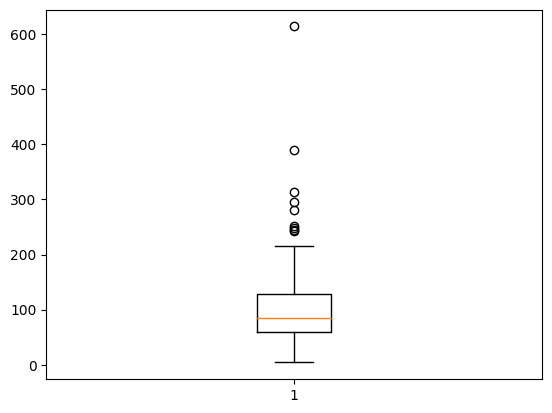

In [30]:
plt.boxplot(np.diag(sim_matrix))

In [31]:
np.tril(sim_matrix)

array([[ 31.,   0.,   0., ...,   0.,   0.,   0.],
       [ 16.,  13.,   0., ...,   0.,   0.,   0.],
       [ 10.,   7.,  50., ...,   0.,   0.,   0.],
       ...,
       [ 17.,   9.,   2., ...,   9.,   0.,   0.],
       [ 10.,   0.,   3., ...,   3.,  85.,   0.],
       [  3.,   2.,   0., ...,   0.,   3., 390.]])

In [32]:
np.where(np.tri(*sim_matrix.shape, k=-1, dtype=bool))

(array([  1,   2,   2, ..., 119, 119, 119]),
 array([  0,   0,   1, ..., 116, 117, 118]))

In [34]:
other_values = sim_matrix[np.where(np.tri(*sim_matrix.shape, k=-1, dtype=bool))]

{'whiskers': [<matplotlib.lines.Line2D at 0x7f82ec27d640>,
 'caps': [<matplotlib.lines.Line2D at 0x7f82ec27f340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f82ec27d310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f82ec27fa00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f82ec27fd00>],
 'means': []}

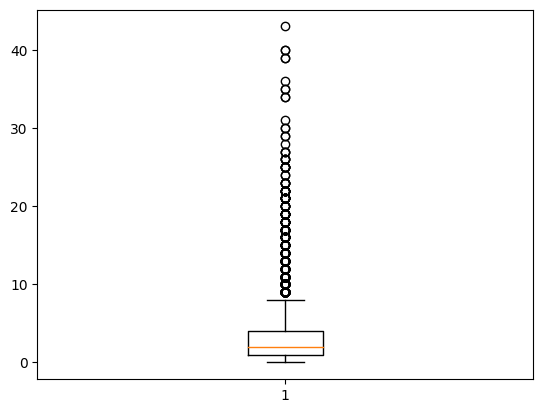

In [35]:
plt.boxplot(other_values)

In [39]:
np.mean(other_values)

3.175490196078431

In [40]:
diag_values = np.diag(sim_matrix)

In [41]:
threshold = 10

In [42]:
np.sum(diag_values > threshold)

117

In [44]:
np.sum(other_values <= threshold)

6783

In [69]:
thresholds = np.array(range(1, 100))
correct_values_by_threshold = []
false_values_by_threshold = []
correct_values_by_threshold_ratio = []
false_values_by_threshold_ratio = []

In [70]:
for th in thresholds:
    correct_values_by_threshold.append(np.sum(diag_values >= th))
    false_values_by_threshold.append(np.sum(other_values >= th))
    correct_values_by_threshold_ratio.append(np.sum(diag_values >= th) / len(diag_values) * 100)
    false_values_by_threshold_ratio.append(np.sum(other_values >= th) / len(other_values) * 100)
correct_values_by_threshold = np.array(correct_values_by_threshold)
false_values_by_threshold = np.array(false_values_by_threshold)
correct_values_by_threshold_ratio = np.array(correct_values_by_threshold_ratio)
false_values_by_threshold_ratio = np.array(false_values_by_threshold_ratio)

In [72]:
metrics = np.array(
    [correct_values_by_threshold,
    false_values_by_threshold,
    correct_values_by_threshold_ratio,
    false_values_by_threshold_ratio]
).transpose()

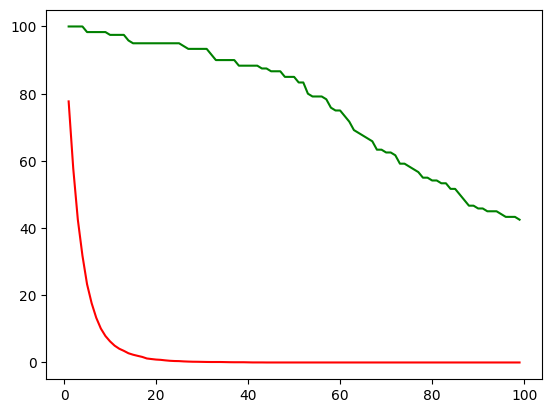

In [75]:
plt.plot(thresholds, metrics[:, 2], color="g", label="correct")
plt.plot(thresholds, metrics[:, 3], color="r", label="false")
plt.show()

In [90]:
thresholds = np.array(range(1, 100))
metrics = {}

for id_comb in range(1, 421):
    comb_str = f"comb_{id_comb}"
    sim_matrix_path = Path("/home/adlane/projets/twinit-dataset/debug/sim_matrix/") / comb_str / "similarity_matrix.csv"
    sim_matrix = np.genfromtxt(str(sim_matrix_path), delimiter=";")
    other_values = sim_matrix[np.where(np.tri(*sim_matrix.shape, k=-1, dtype=bool))]
    diag_values = np.diag(sim_matrix)

    true_positives = []
    false_positives = []
    true_negatives = []
    false_negatives = []
    precision = []
    recall = []
    accuracy = []
    f1_score = []
    true_positives_ratio = []
    false_positives_ratio = []
    mean_ratio = []

    for th in thresholds:
        tp = np.sum(diag_values >= th)
        fp = np.sum(other_values >= th)
        tn = len(other_values) - fp
        fn = len(diag_values) - tp
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        acc = (tp + tn) / (tp + tn + fn + fp)
        tp_ratio = tp / len(diag_values) * 100
        fp_ratio = fp / len(other_values) * 100

        true_positives.append(tp)
        false_positives.append(fp)
        true_negatives.append(tn)
        false_negatives.append(fn)

        precision.append(prec)
        recall.append(rec)
        accuracy.append(acc)
        f1_score.append(2 * (prec * rec) / (prec + rec))

        true_positives_ratio.append(tp_ratio)
        false_positives_ratio.append(fp_ratio)

        mean_ratio.append((tp_ratio + (100 - fp_ratio)) / 2)

    true_positives = np.array(true_positives)
    false_positives = np.array(false_positives)
    true_negatives = np.array(true_negatives)
    false_negatives = np.array(false_negatives)

    precision = np.array(precision)
    recall = np.array(recall)
    accuracy = np.array(accuracy)
    f1_score = np.array(f1_score)
    true_positives_ratio = np.array(true_positives_ratio)
    false_positives_ratio = np.array(false_positives_ratio)

    metrics[comb_str] = np.array(
        [true_positives,
         false_positives,
         true_negatives,
         false_negatives,
         precision,
         recall,
         accuracy,
         f1_score,
         true_positives_ratio,
         false_positives_ratio,
         mean_ratio]
    ).transpose()

    plt.plot(thresholds, metrics[comb_str][:, 8], color="g", label="correct")
    plt.plot(thresholds, metrics[comb_str][:, 9], color="r", label="false")
    plt.savefig(sim_matrix_path.parent / "metrics.png")
    plt.close()

/tmp/ipykernel_16460/3564437640.py:28: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)
/tmp/ipykernel_16460/3564437640.py:28: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)
/tmp/ipykernel_16460/3564437640.py:28: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)
/tmp/ipykernel_16460/3564437640.py:28: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)
/tmp/ipykernel_16460/3564437640.py:28: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)
/tmp/ipykernel_16460/3564437640.py:28: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)
/tmp/ipykernel_16460/3564437640.py:28: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)
/tmp/ipykernel_16460/3564437640.py:28: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)
/tmp/ipykernel_16460/3564437640.

In [91]:
best_threshold_by_comb = {}
for k, met in metrics.items():
    best_threshold_by_comb[k] = (np.max(met[:, 7]), np.argmax(met[:, 7]) + 1)

In [92]:
best_thres = best_threshold_by_comb["comb_1"][1]
best_value = best_threshold_by_comb["comb_1"][0]
best_comb = "comb 1"
for comb, (value, th) in best_threshold_by_comb.items():
    current_thres = best_threshold_by_comb[comb][1]
    current_value = best_threshold_by_comb[comb][0]
    if best_value < current_value:
        best_value = current_value
        best_thres = current_thres
        best_comb = comb

print(best_value)
print(best_thres)
print(best_comb)

0.9487179487179489
21
comb_335
